<a href="https://colab.research.google.com/github/ntmai03/DataAnalysisProject/blob/main/08-DNN/1_RegressionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# <font color='#f78fb3'> **1 Setup**<br> </font> 

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import sklearn.decomposition as dec
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Common imports
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
# import seaborn to make nice plots
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

---
---
# <font color='#f78fb3'> **2 Regression**<br> </font> 

### <font color='#f78fb3'> <font color='#f9ca24'>**3.1 California housing**<br> </font>  

#### <font color='lightgreen'>**Prepare data**</font>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((11610, 8), (5160, 8))

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### <font color='lightgreen'>**Construction Phase**</font>

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

# compile
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# model.compile(optimizer='rmsprop', loss='mse')
# using checkpoint to save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_housing_model2.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
# Using Callbacks during Training
model = keras.models.load_model("california_housing_model2.h5")  #  rollback to best model
mse_test = model.evaluate(X_test, y_test)
mse_train = model.evaluate(X_train, y_train)

Epoch 1/20
363/363 [==============================] - 3s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

val_train_ratio_cb = PrintValTrainRatioCallback()
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_housing_model2.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb, checkpoint_cb])
model = keras.models.load_model("california_housing_model2.h5")  #  rollback to best model
mse_test = model.evaluate(X_test, y_test)
mse_train = model.evaluate(X_train, y_train)

Epoch 1/20
356/363 [============================>.] - ETA: 0s - loss: 1.9089
val/train: 0.38
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/20
361/363 [============================>.] - ETA: 0s - loss: 0.6573
val/train: 1.05
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/20
363/363 [==============================] - ETA: 0s - loss: 0.5934
val/train: 0.98
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/20
362/363 [============================>.] - ETA: 0s - loss: 0.5544
val/train: 0.93
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/20
354/363 [============================>.] - ETA: 0s - loss: 0.5263
val/train: 0.93
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/20
340/363 [===========================>..] - ETA: 0s - loss: 0.5023
val/train: 0.

In [ ]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 363}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
dict_keys(['loss', 'val_loss'])


#### <font color='lightgreen'>**Prediction**</font>

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred[:3]

array([[0.5147517],
       [1.8584764],
       [3.3048759]], dtype=float32)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [ ]:
# Prediction
test_predictions = model.predict(X_test)
print(test_predictions[0:5])

# Calculate error
pred_df = pd.DataFrame(y_test, columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test Y', 'Model Prediction']
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Prediction']
pred_df.head()

#### <font color='lightgreen'>**Performance Evaluation**</font>

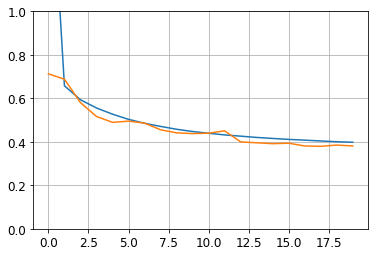

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.4003


0.4003303050994873

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Prediction
test_predictions = model.predict(X_test)
print(model.metrics_names)

# Train score, test score
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(training_score, test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

['loss']
0.40156564116477966 0.4003303050994873
RMSE: 0.633
MSE: 0.400
MAE: 0.452
r2: 0.698


#### <font color='lightgreen'>**Saving and Restoring**</font>

In [ ]:
model.save("california_housing_model1.h5")
model = keras.models.load_model("california_housing_model1.h5")
model.predict(X_new)

array([[0.5147517],
       [1.8584764],
       [3.3048759]], dtype=float32)

In [ ]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

#### <font color='lightgreen'>**Hyperparameter Tuning & Early Stopping**</font>

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_l

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3412


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
tf.random.set_seed(42)

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(10, 30).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),

}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f2da3cac890>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [ ]:
rnd_search_cv.best_score_

-0.3177357614040375

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2788


-0.2787829637527466

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2788


0.2787829637527466

---
---
# <font color='#f78fb3'> **2 Classification**<br> </font> 

### <font color='#f78fb3'> <font color='#f9ca24'>**2.1 Fashion MNISTS**<br> </font>  

#### <font color='lightgreen'>**Prepare data**</font>

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### <font color='lightgreen'>**Construction Phase**</font>

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


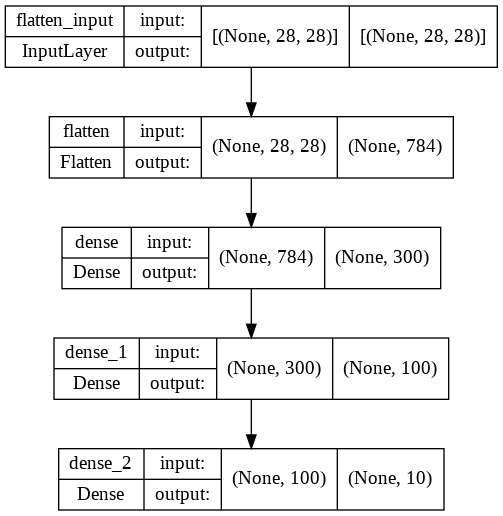

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

#### <font color='lightgreen'>**Execution Phase**</font>

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',  # keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',   # keras.optimizers.SGD()
              metrics='accuracy')  # keras.metrics.sparse_category_accuracy
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5316 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4126 - accuracy: 0.8564 - val_loss: 0.3915 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3749 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3711 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3634 - accuracy: 0.8712 - val_loss: 0.3614 - val_accuracy:

In [ ]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### <font color='lightgreen'>**Performance Evaluation**</font>

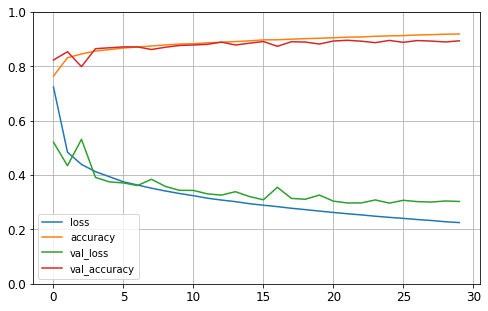

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8844


[0.3370753824710846, 0.8844000101089478]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

#### <font color='lightgreen'>**Prediction**</font>

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

### <font color='#f78fb3'> <font color='#f9ca24'>**2.2 MNISTS**<br> </font>  

#### <font color='lightgreen'>**Dataset**</font>

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full.shape, X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### <font color='lightgreen'>**Searching optimal learning rate**</font>
<font color='#3dc1d3'> 
+ Growing the learning rate exponentially
+ Plotting the loss, finding the point where the loss shoots up
+ Save checkpoints, use early stopping
+ Plot learning curves using TensorBoard </font>

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.learning_rate))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.5773 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

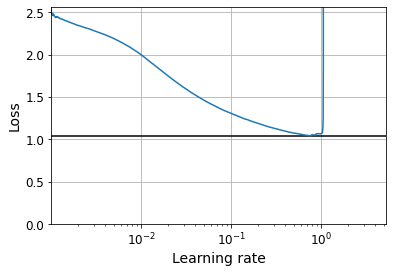

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2363 - accuracy: 0.9263 - val_loss: 0.0975 - val_accuracy: 0.9712
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0954 - accuracy: 0.9699 - val_loss: 0.1055 - val_accuracy: 0.9708
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0721 - val_accuracy: 0.9796
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9874 - val_loss: 0.0778 - val_accuracy: 0.9800
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0741 - val_accuracy: 0.9826
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0757 - val_ac

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9766


[0.07713202387094498, 0.9765999913215637]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir=./my_mnist_logs --port=6008

### 6.5. Example Three: Adding in DropOut Layers

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6949 - val_loss: 0.6889
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6858 - val_loss: 0.6750
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6746 - val_loss: 0.6629
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6557 - val_loss: 0.6481
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6491 - val_loss: 0.6333
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6277 - val_loss: 0.6165
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.5969
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5897 - val_loss: 0.5719
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5783 - val_loss: 0.5462
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5544 - val_loss: 0.5114
Epoch 11

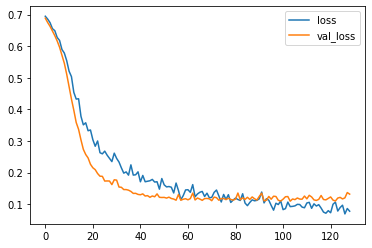

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()